In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset (Update file path as needed)
data = pd.read_csv("/content/train.csv")  # Replace with actual file name

# Display basic info
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            84960 non-null  int64  
 1   Year                          84960 non-null  int64  
 2   Month                         84960 non-null  int64  
 3   Day                           84960 non-null  int64  
 4   kingdom                       84960 non-null  object 
 5   latitude                      84960 non-null  float64
 6   longitude                     84960 non-null  float64
 7   Avg_Temperature               84960 non-null  float64
 8   Avg_Feels_Like_Temperature    84960 non-null  float64
 9   Temperature_Range             84960 non-null  float64
 10  Feels_Like_Temperature_Range  84960 non-null  float64
 11  Radiation                     84960 non-null  float64
 12  Rain_Amount                   84960 non-null  float64
 13  R

In [ ]:
# Calculate missing values column-wise
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
missing_values


Missing Values per Column:


,0
ID,0
Year,0
Month,0
Day,0
kingdom,0
latitude,0
longitude,0
Avg_Temperature,0
Avg_Feels_Like_Temperature,0
Temperature_Range,0


In [ ]:
# Choose a reference year (e.g., 2000)
reference_year = 1998  # year 2 is a leap year

# This makes Year=1 correspond to the reference_year
data['Date'] = pd.to_datetime({
    'year': data['Year'] + reference_year,
    'month': data['Month'],
    'day': data['Day']
})

In [ ]:
data.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,Date
0,1,1,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659,1999-04-01
1,2,1,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094,1999-04-01
2,3,1,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309,1999-04-01
3,4,1,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997,1999-04-01
4,5,1,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189,1999-04-01


In [ ]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
ID,84960.0,42480.5,1.0,21240.75,42480.5,63720.25,84960.0,24525.983772
Year,84960.0,4.610876,1.0,3.0,5.0,7.0,8.0,2.239331
Day,84960.0,15.735876,1.0,8.0,16.0,23.0,31.0,8.802867
latitude,84960.0,24.003334,22.88,23.680003,23.780002,24.280002,26.580005,0.798622
longitude,84960.0,-37.266665,-37.72998,-37.630006,-37.53,-37.130006,-35.72998,0.488873
Avg_Temperature,84960.0,135.600751,18.6,26.3,28.1,299.35,303.65,133.650417
Avg_Feels_Like_Temperature,84960.0,139.735375,18.7,30.3,32.5,303.85,309.65,133.937168
Temperature_Range,84960.0,5.345287,0.5,3.8,5.1,6.5,15.4,1.977739
Feels_Like_Temperature_Range,84960.0,6.361224,0.8,4.5,6.2,8.0,17.3,2.37188
Radiation,84960.0,20.338598,3.19,18.07,20.96,23.3,30.1,4.118938


## Rain Amount Plot

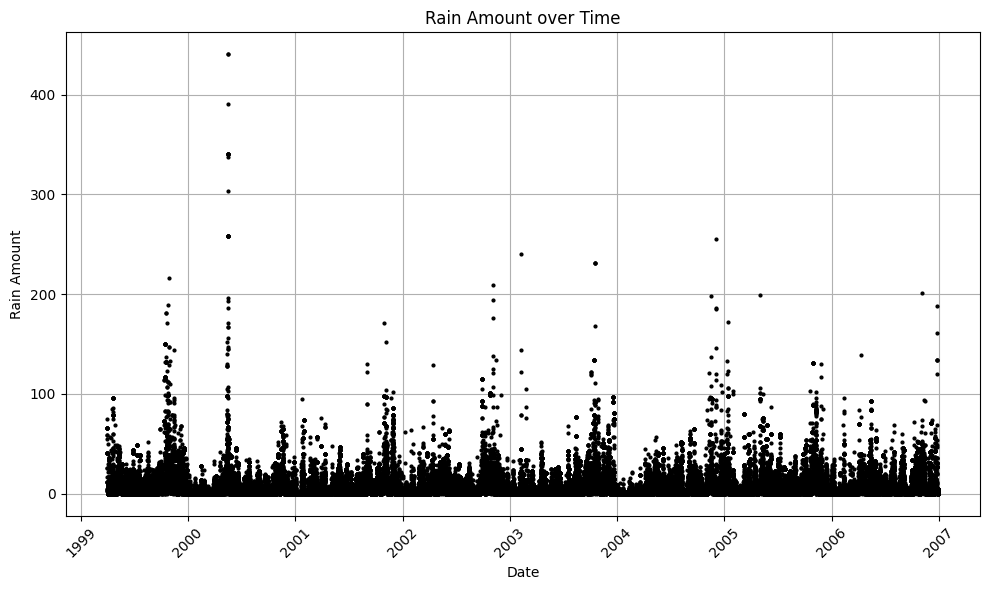

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Rain_Amount'], 'k.', markersize=4)
plt.xlabel('Date')
plt.ylabel('Rain Amount')
plt.title('Rain Amount over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Average Temperature Plot

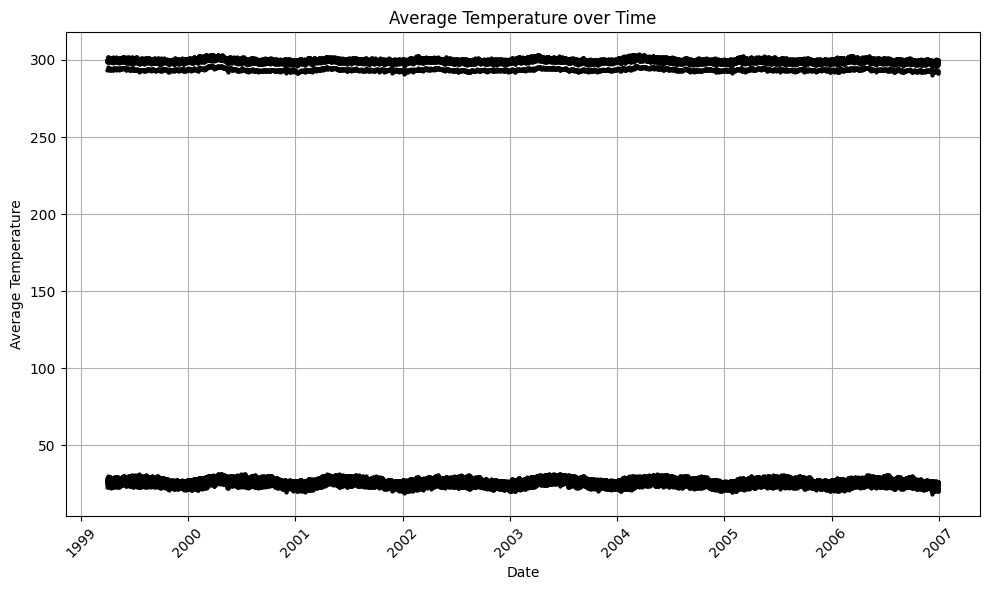

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Avg_Temperature'], 'k.', markersize=4)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Above plot clearly show that temperature are recorded in two totally different ranges. This clearly proofs temperature values are in two different units.

## Radiation Plot

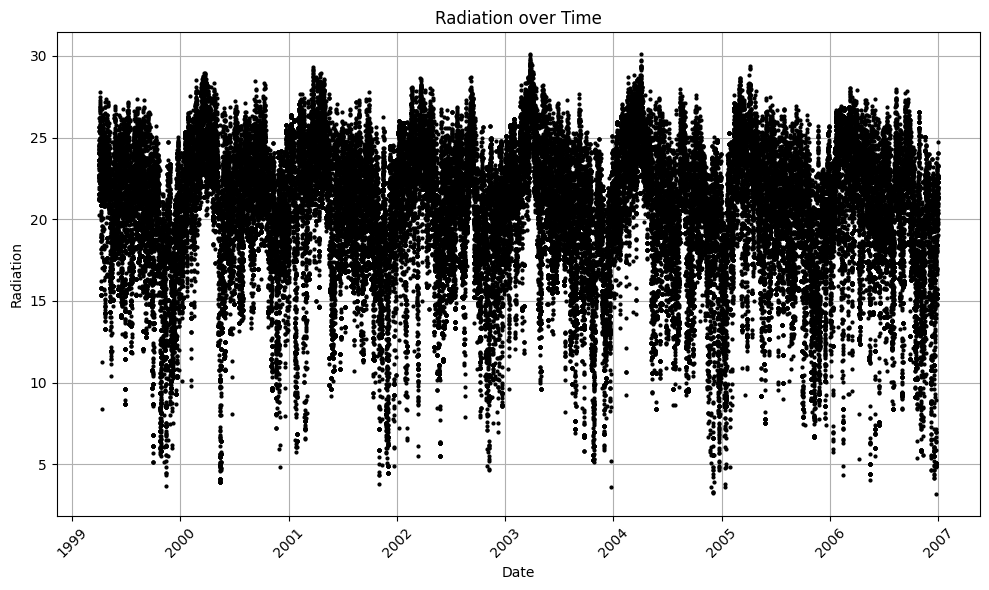

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Radiation'], 'k.', markersize=4)
plt.xlabel('Date')
plt.ylabel('Radiation')
plt.title('Radiation over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Wind Speed Plot

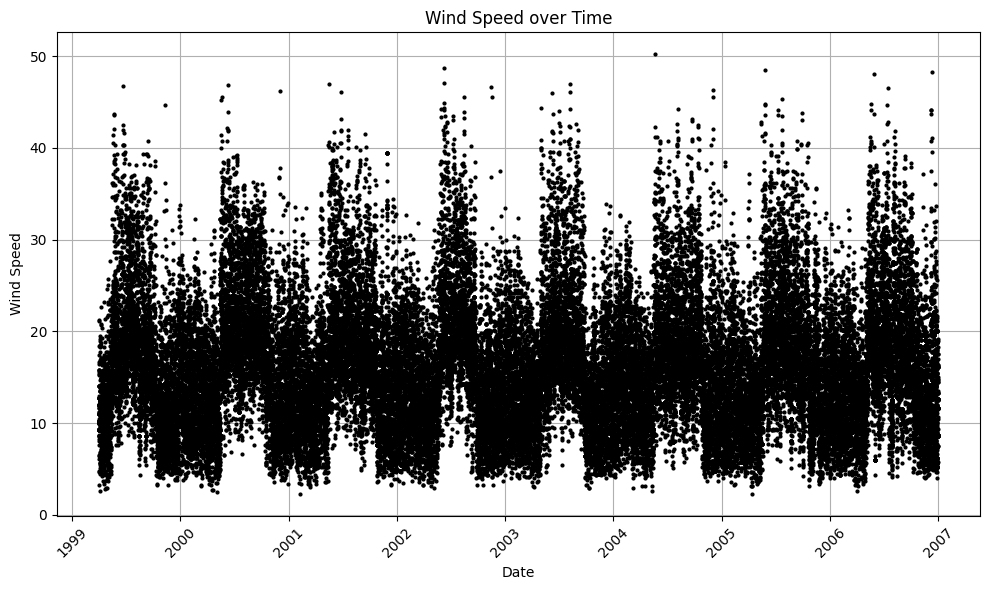

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Wind_Speed'], 'k.', markersize=4)
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.title('Wind Speed over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Wind Direction Plot

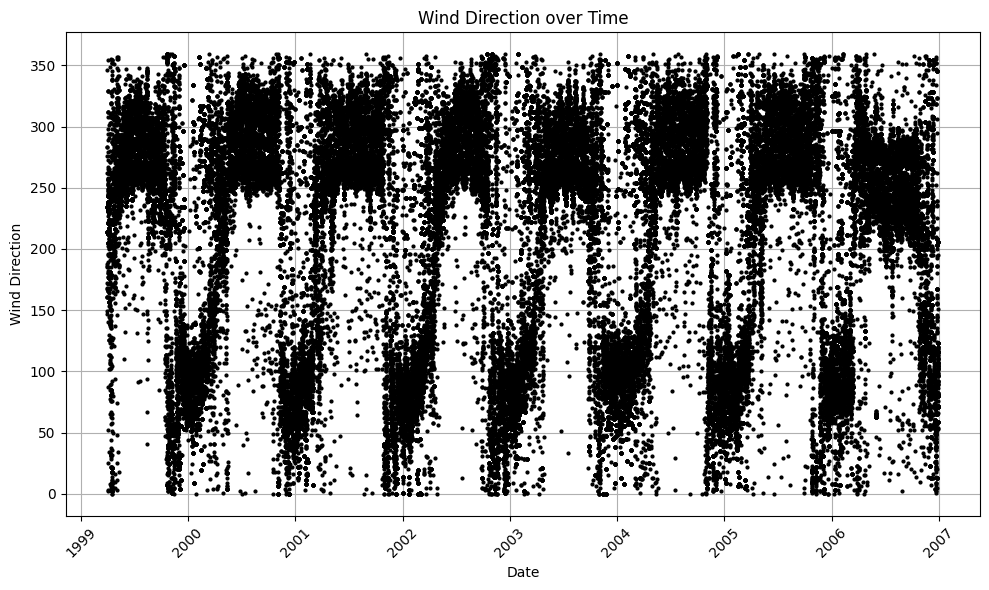

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Wind_Direction'], 'k.', markersize=4)
plt.xlabel('Date')
plt.ylabel('Wind Direction')
plt.title('Wind Direction over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<ipython-input-27-4e829252c870>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rainfall = data.groupby('Month')['Rain_Amount'].mean()


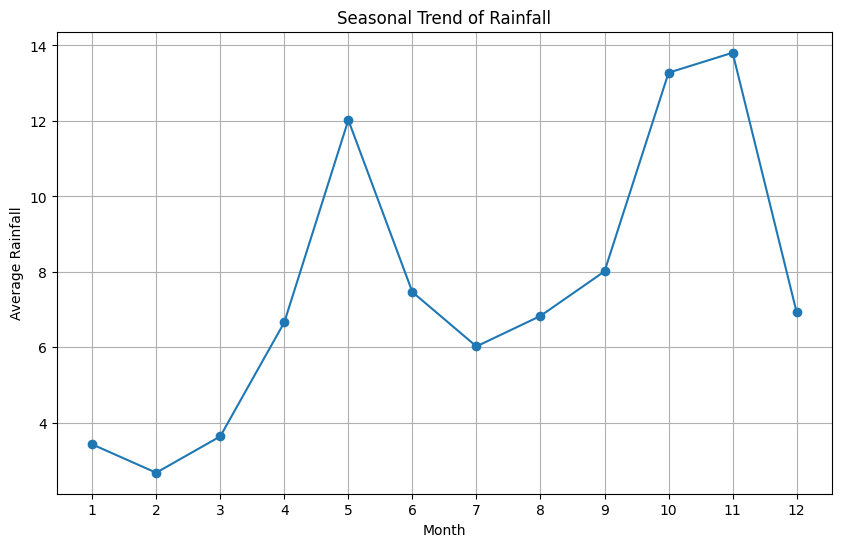

In [ ]:
data['Month'] = data['Month'].astype('category')

# Group data by month and calculate the mean rainfall
monthly_rainfall = data.groupby('Month')['Rain_Amount'].mean()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_rainfall.index, monthly_rainfall.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Seasonal Trend of Rainfall')
plt.xticks(monthly_rainfall.index)  # Ensure all month labels are shown
plt.grid(True)
plt.show()

<ipython-input-30-920b14527b13>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_radiation = data.groupby('Month')['Radiation'].mean()


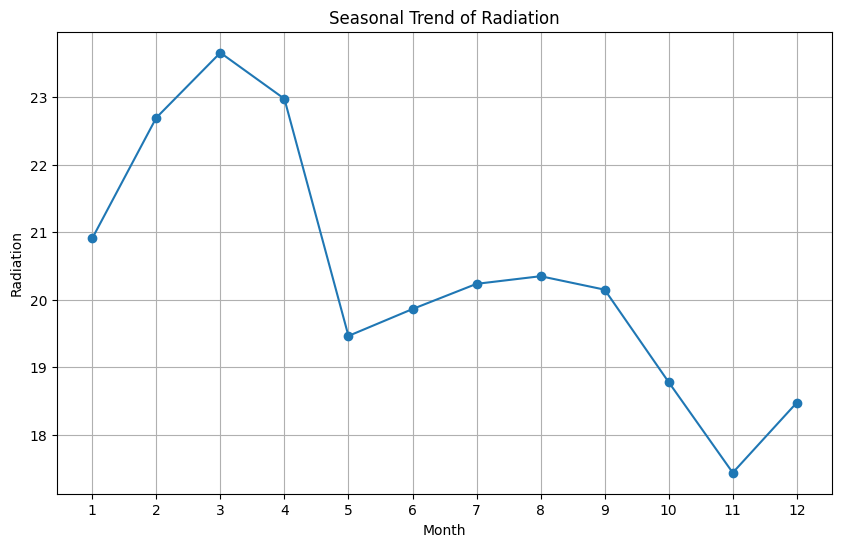

In [ ]:
data['Month'] = data['Month'].astype('category')

# Group data by month and calculate the mean rainfall
monthly_radiation = data.groupby('Month')['Radiation'].mean()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_radiation.index, monthly_radiation.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Radiation')
plt.title('Seasonal Trend of Radiation')
plt.xticks(monthly_radiation.index)  # Ensure all month labels are shown
plt.grid(True)
plt.show()

<ipython-input-31-d3d02b21a70f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_wind_speed = data.groupby('Month')['Wind_Speed'].mean()


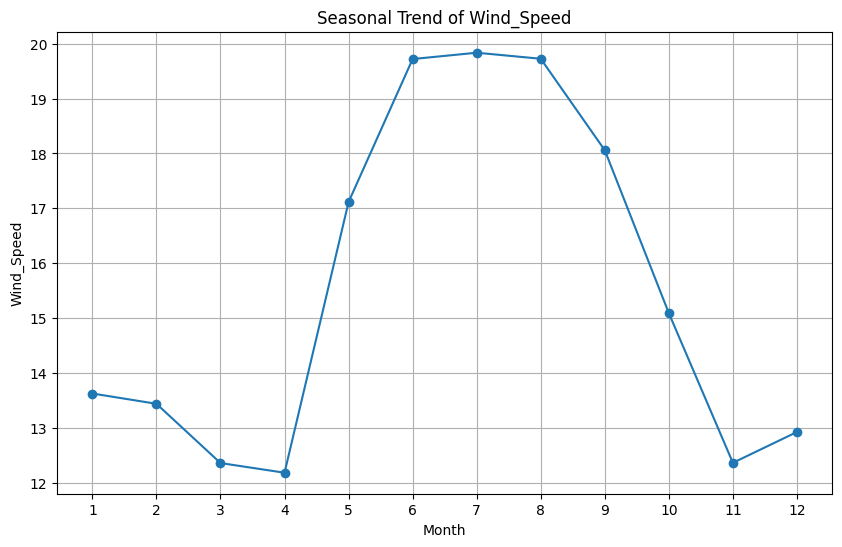

In [ ]:
data['Month'] = data['Month'].astype('category')

# Group data by month and calculate the mean rainfall
monthly_wind_speed = data.groupby('Month')['Wind_Speed'].mean()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_wind_speed.index, monthly_wind_speed.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Wind_Speed')
plt.title('Seasonal Trend of Wind_Speed')
plt.xticks(monthly_wind_speed.index)  # Ensure all month labels are shown
plt.grid(True)
plt.show()

In [ ]:
# Data distribution analysis
def analyze_data_distribution(data, column_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column_name])
    plt.title(f'Boxplot of {column_name}')

    plt.tight_layout()
    plt.show()
    print(f"Descriptive statistics for {column_name}:")
    print(data[column_name].describe())

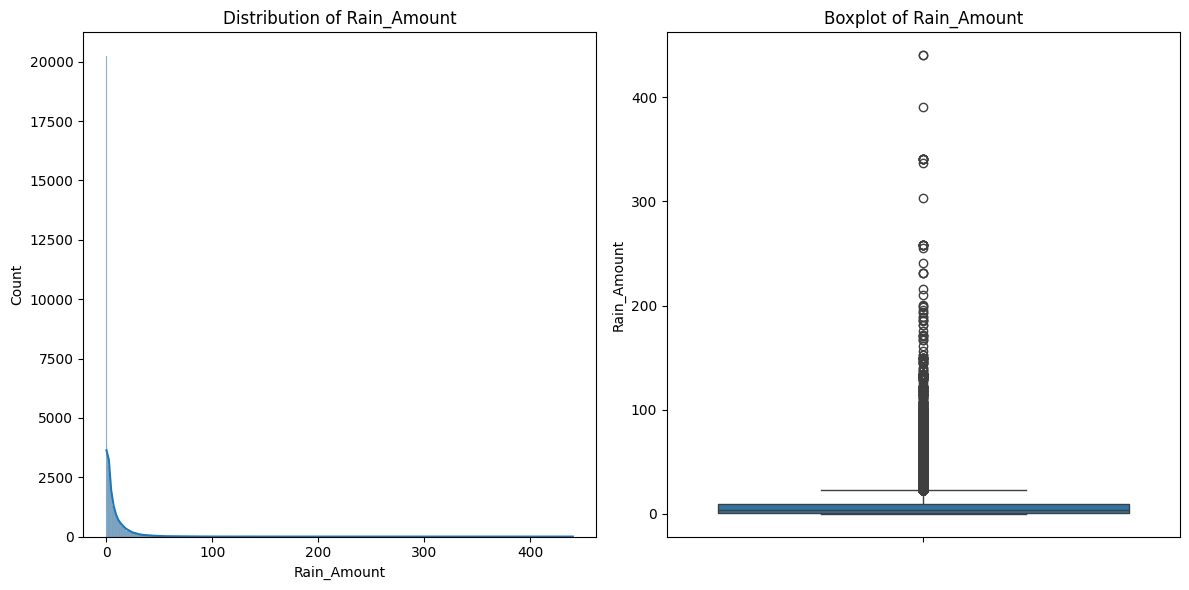

Descriptive statistics for Rain_Amount:
count    84960.000000
mean         7.723850
std         13.477186
min          0.000000
25%          0.520000
50%          3.380000
75%          9.490000
max        440.440000
Name: Rain_Amount, dtype: float64


In [ ]:
analyze_data_distribution(data, 'Rain_Amount')

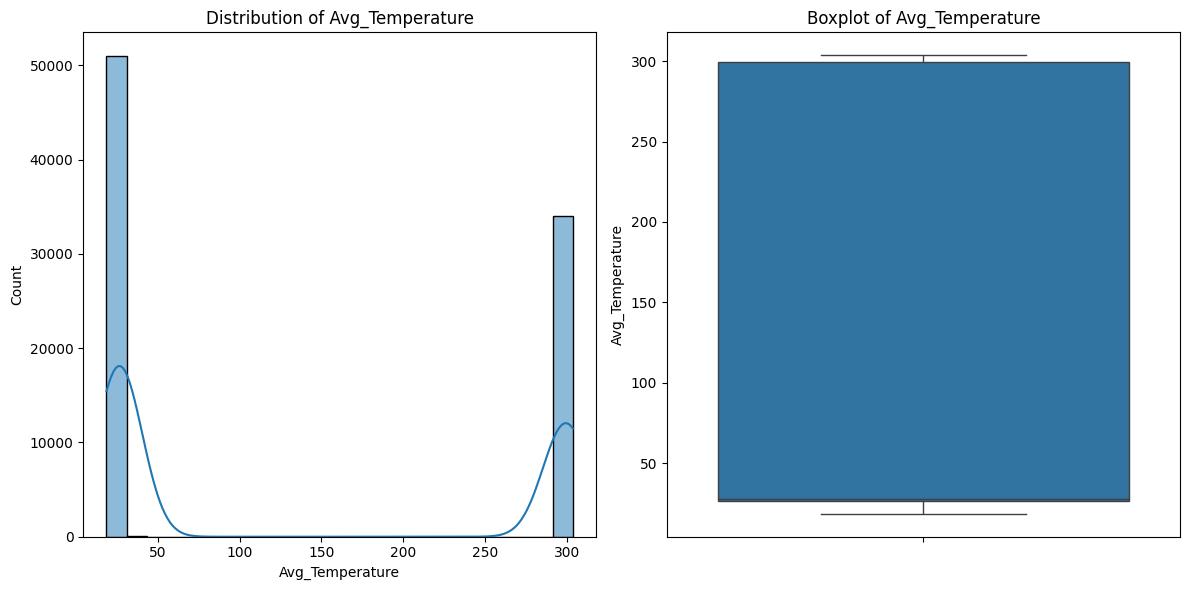

Descriptive statistics for Avg_Temperature:
count    84960.000000
mean       135.600751
std        133.650417
min         18.600000
25%         26.300000
50%         28.100000
75%        299.350000
max        303.650000
Name: Avg_Temperature, dtype: float64


In [ ]:
analyze_data_distribution(data, 'Avg_Temperature')

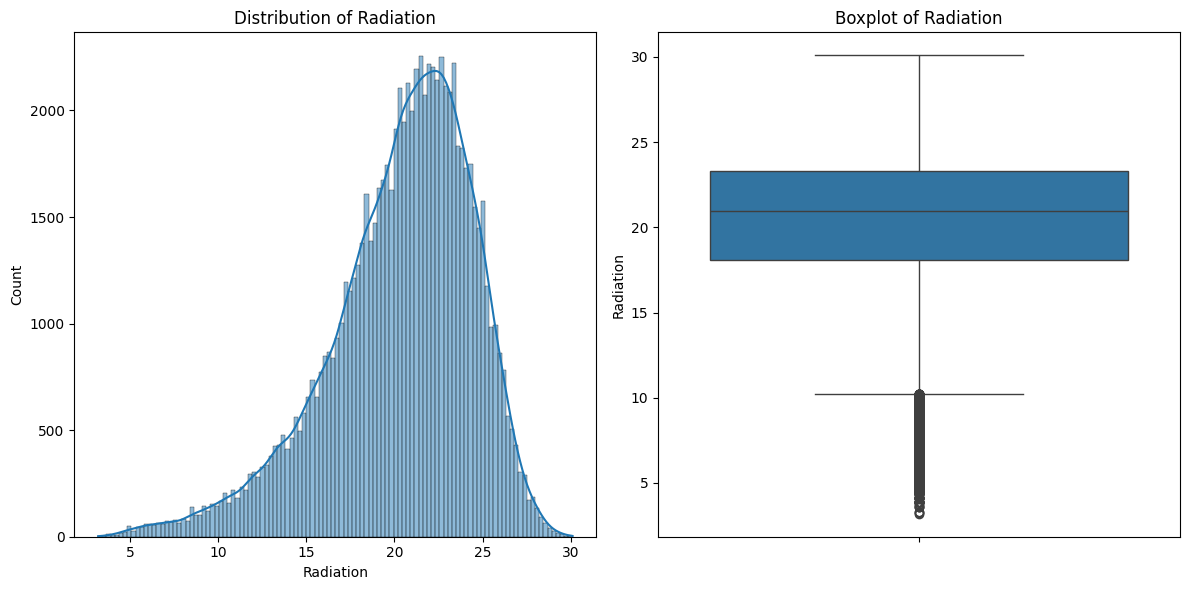

Descriptive statistics for Radiation:
count    84960.000000
mean        20.338598
std          4.118938
min          3.190000
25%         18.070000
50%         20.960000
75%         23.300000
max         30.100000
Name: Radiation, dtype: float64


In [ ]:
analyze_data_distribution(data, 'Radiation')

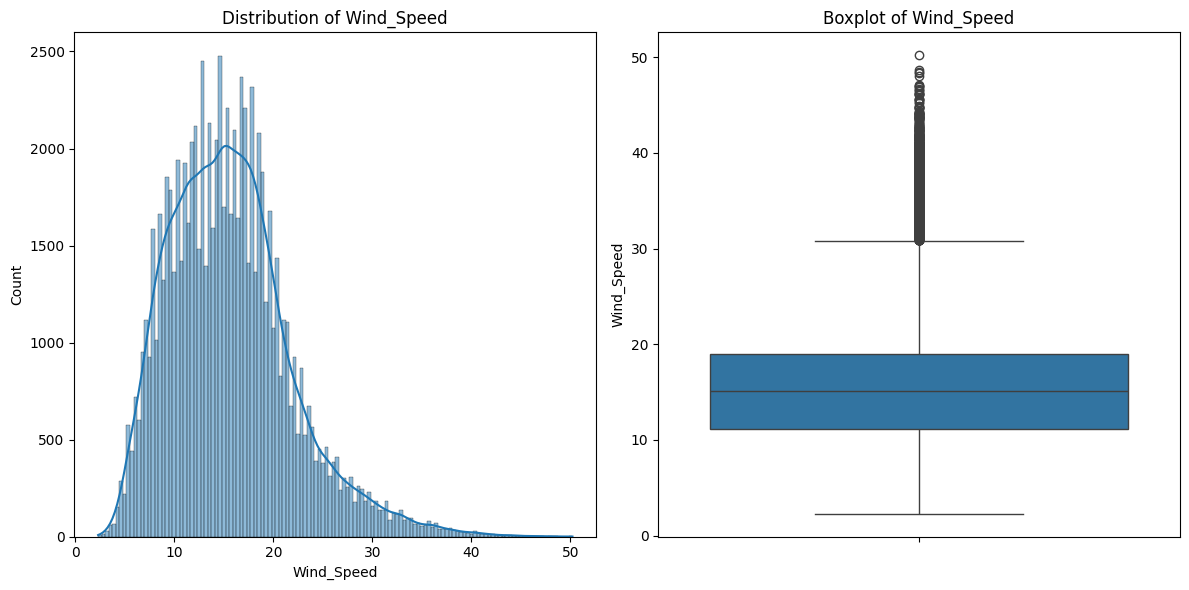

Descriptive statistics for Wind_Speed:
count    84960.000000
mean        15.629291
std          6.198760
min          2.300000
25%         11.100000
50%         15.100000
75%         19.000000
max         50.200000
Name: Wind_Speed, dtype: float64


In [ ]:
analyze_data_distribution(data, 'Wind_Speed')

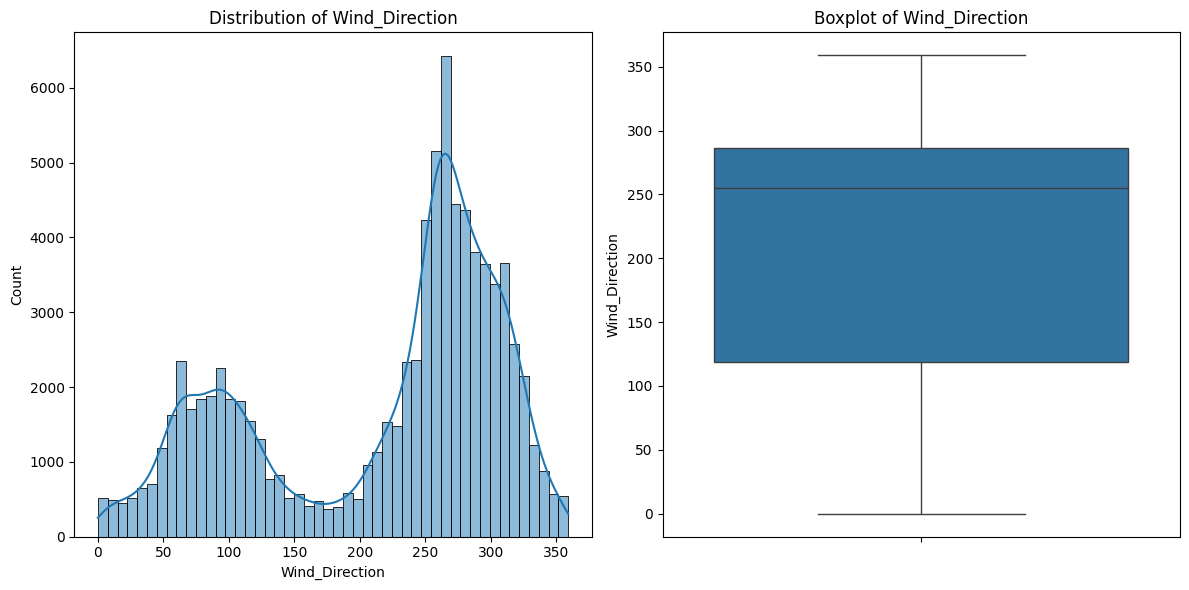

Descriptive statistics for Wind_Direction:
count    84960.000000
mean       215.831297
std         93.917858
min          0.000000
25%        119.000000
50%        255.000000
75%        286.000000
max        359.000000
Name: Wind_Direction, dtype: float64


In [ ]:
analyze_data_distribution(data, 'Wind_Direction')

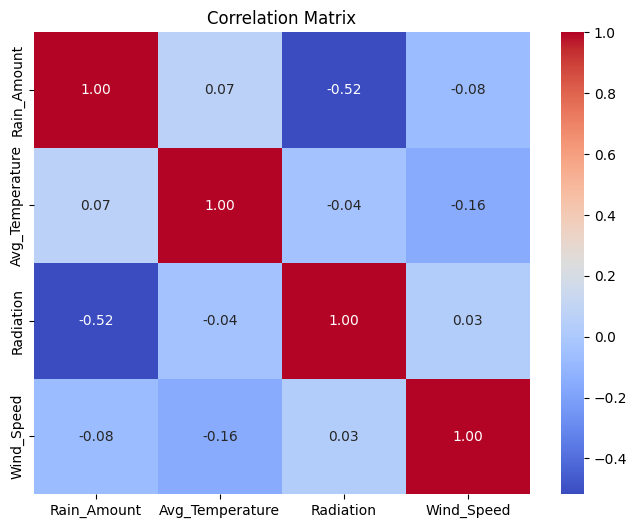

In [ ]:
# Correlation Analysis
correlation_matrix = data[['Rain_Amount', 'Avg_Temperature', 'Radiation', 'Wind_Speed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Outlier detection using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [ ]:
outliers_rain = detect_outliers_iqr(data, 'Rain_Amount')
print(f"\nOutliers in rain amount:\n{outliers_rain}")


Outliers in rain amount:
          ID  Year Month  Day       kingdom   latitude  longitude  \
0          1     1     4    1       Arcadia  24.280002 -37.229980   
3          4     1     4    1       Camelot  24.180003 -36.929994   
5          6     1     4    1          Eden  23.780002 -37.630006   
7          8     1     4    1       Elysium  23.780002 -37.630006   
8          9     1     4    1  Emerald City  23.479999 -37.530000   
...      ...   ...   ...  ...           ...        ...        ...   
84777  84778     8    12   25        Utopia  23.979999 -37.630006   
84778  84779     8    12   25       Valyria  24.280002 -35.729980   
84779  84780     8    12   25    Winterfell  23.979999 -36.429994   
84783  84784     8    12   26       Camelot  24.180003 -36.929994   
84793  84794     8    12   26       Midgard  24.479999 -36.929994   

       Avg_Temperature  Avg_Feels_Like_Temperature  Temperature_Range  \
0                25.50                       30.50                8.5   

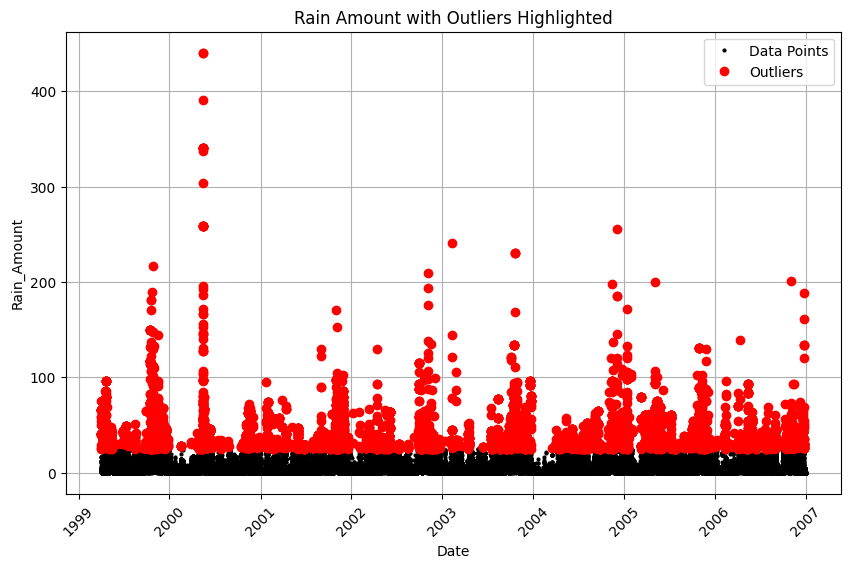

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Rain_Amount'], 'k.', markersize=4, label='Data Points')
plt.plot(outliers_rain['Date'], outliers_rain['Rain_Amount'], 'ro', markersize=6, label='Outliers')  # Highlight outliers
plt.xlabel('Date')
plt.ylabel('Rain_Amount')
plt.title('Rain Amount with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
outliers_temp = detect_outliers_iqr(data, 'Avg_Temperature')
print(f"\nOutliers in average temperature:\n{outliers_temp}")


Outliers in average temperature:
Empty DataFrame
Columns: [ID, Year, Month, Day, kingdom, latitude, longitude, Avg_Temperature, Avg_Feels_Like_Temperature, Temperature_Range, Feels_Like_Temperature_Range, Radiation, Rain_Amount, Rain_Duration, Wind_Speed, Wind_Direction, Evapotranspiration, Date]
Index: []


In [ ]:
outliers_rad = detect_outliers_iqr(data, 'Radiation')
print(f"\nOutliers in radiation:\n{outliers_rad}")


Outliers in radiation:
          ID  Year Month  Day     kingdom   latitude  longitude  \
5431    5432     1     9   29    Atlantis  22.979999 -37.329990   
5432    5433     1     9   29      Avalon  22.880000 -37.130006   
5435    5436     1     9   29        Eden  23.780002 -37.630006   
5436    5437     1     9   29   El Dorado  23.680003 -37.229980   
5437    5438     1     9   29     Elysium  23.780002 -37.630006   
...      ...   ...   ...  ...         ...        ...        ...   
84774  84775     8    12   25      Solara  23.380000 -37.530000   
84775  84776     8    12   25    Solstice  25.479998 -36.329990   
84777  84778     8    12   25      Utopia  23.979999 -37.630006   
84778  84779     8    12   25     Valyria  24.280002 -35.729980   
84779  84780     8    12   25  Winterfell  23.979999 -36.429994   

       Avg_Temperature  Avg_Feels_Like_Temperature  Temperature_Range  \
5431            298.95                      303.45                2.5   
5432             24.80   

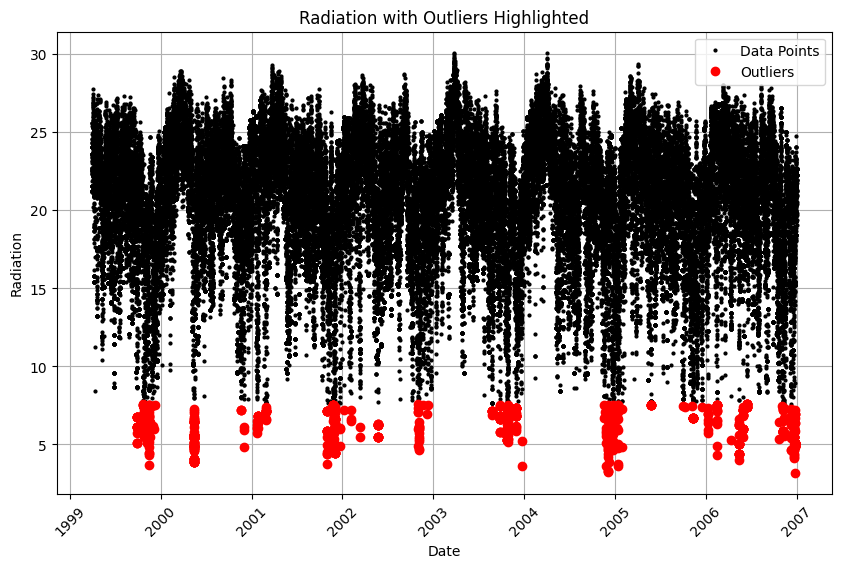

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Radiation'], 'k.', markersize=4, label='Data Points')
plt.plot(outliers_rad['Date'], outliers_rad['Radiation'], 'ro', markersize=6, label='Outliers')
plt.xlabel('Date')
plt.ylabel('Radiation')
plt.title('Radiation with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
outliers_wind = detect_outliers_iqr(data, 'Wind_Speed')
print(f"\nOutliers in wind speed:\n{outliers_wind}")


Outliers in wind speed:
          ID  Year Month  Day   kingdom   latitude  longitude  \
1406    1407     1     5   17  Sunspear  26.580005  -37.53000   
1436    1437     1     5   18  Sunspear  26.580005  -37.53000   
1444    1445     1     5   19     Dorne  25.780002  -37.53000   
1466    1467     1     5   19  Sunspear  26.580005  -37.53000   
1474    1475     1     5   20     Dorne  25.780002  -37.53000   
...      ...   ...   ...  ...       ...        ...        ...   
84268  84269     8    12    8   Valyria  24.280002  -35.72998   
84274  84275     8    12    9     Dorne  25.780002  -37.53000   
84295  84296     8    12    9  Solstice  25.479998  -36.32999   
84296  84297     8    12    9  Sunspear  26.580005  -37.53000   
84686  84687     8    12   22  Sunspear  26.580005  -37.53000   

       Avg_Temperature  Avg_Feels_Like_Temperature  Temperature_Range  \
1406              27.6                        29.2                2.3   
1436              28.2                        29

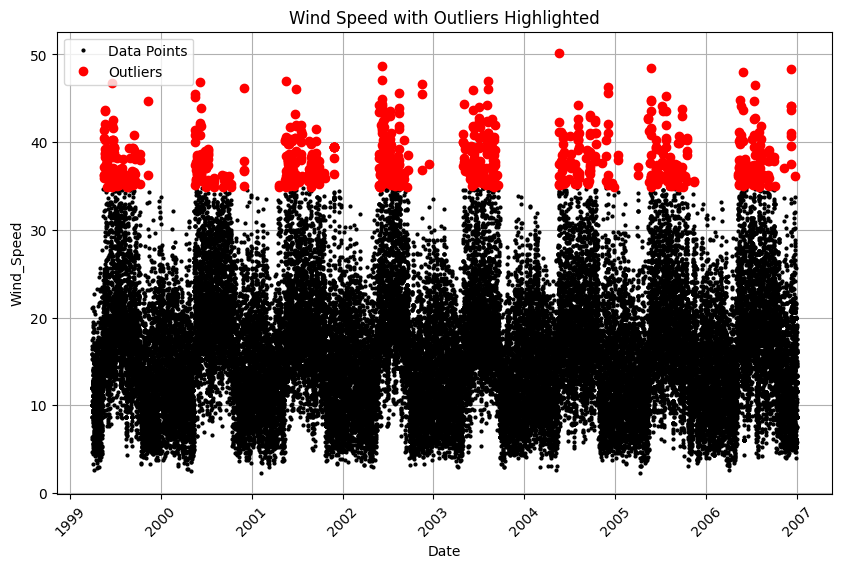

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Wind_Speed'], 'k.', markersize=4, label='Data Points')
plt.plot(outliers_wind['Date'], outliers_wind['Wind_Speed'], 'ro', markersize=6, label='Outliers')
plt.xlabel('Date')
plt.ylabel('Wind_Speed')
plt.title('Wind Speed with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()